In [1]:
import sys
sys.path.append('../')

import tensorflow as tf
import graphgallery 
import matplotlib.pyplot as plt


# Set if memory growth should be enabled for ALL `PhysicalDevice`.
graphgallery.set_memory_growth()

2 Physical GPUs, 2 Logical GPUs


In [2]:
tf.__version__

'2.1.0'

In [3]:
graphgallery.__version__

'0.2.0'

# Load the Datasets
+ cora
+ citeseer
+ pubmed

In [4]:
from graphgallery.data import Planetoid

# set `verbose=False` to avoid these printed tables
data = Planetoid('cora', root="~/GraphData/datasets", verbose=False)
adj, x, labels = data.graph.unpack()
idx_train, idx_val, idx_test = data.split()


Downloaded dataset files have existed.
Processing...
Processing completed.


In [5]:
data.supported_datasets

{'citeseer', 'cora', 'pubmed'}

# Deepwalk model
+ adj: Scipy sparse matrix
+ labels: Numpy array


In [6]:
%%time
from graphgallery.nn.models import Deepwalk
model = Deepwalk(adj, labels)
model.build()
model.train(idx_train)
accuracy = model.test(idx_test)
print(f'Test accuracy {accuracy:.2%}')

Test accuracy 72.40%
CPU times: user 8.09 s, sys: 136 ms, total: 8.23 s
Wall time: 2.7 s


## Show parameters 

In [7]:
# show training parameters
model.show('train')

+------------+-----------------------------------------------------------------+
| Parameters |                              Value                              |
+============+=================================================================+
| Name       | Deepwalk                                                        |
+------------+-----------------------------------------------------------------+
| classifier | LogisticRegression(C=1.0, class_weight=None, dual=False,        |
|            | fit_intercept=True,                                             |
|            |                    intercept_scaling=1, l1_ratio=None,          |
|            | max_iter=1000,                                                  |
|            |                    multi_class='auto', n_jobs=None,             |
|            | penalty='l2',                                                   |
|            |                    random_state=None, solver='lbfgs',           |
|            | tol=0.0001, v

In [8]:
# show model parameters
model.show('model')

+-----------------+----------+
|   Parameters    |  Value   |
+=================+==========+
| Name            | Deepwalk |
+-----------------+----------+
| embedding_dim   | 64       |
+-----------------+----------+
| iter            | 1        |
+-----------------+----------+
| num_neg_samples | 1        |
+-----------------+----------+
| walk_length     | 80       |
+-----------------+----------+
| walks_per_node  | 10       |
+-----------------+----------+
| window_size     | 5        |
+-----------------+----------+
| workers         | 16       |
+-----------------+----------+


In [9]:
# By defaule, show all
model.show()

+-----------------+------------------------------------------------------------+
|   Parameters    |                           Value                            |
+=================+============================================================+
| Name            | Deepwalk                                                   |
+-----------------+------------------------------------------------------------+
| classifier      | LogisticRegression(C=1.0, class_weight=None, dual=False,   |
|                 | fit_intercept=True,                                        |
|                 |                    intercept_scaling=1, l1_ratio=None,     |
|                 | max_iter=1000,                                             |
|                 |                    multi_class='auto', n_jobs=None,        |
|                 | penalty='l2',                                              |
|                 |                    random_state=None, solver='lbfgs',      |
|                 | tol=0.00

In [10]:
embeddings = model.embeddings

In [11]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(embeddings)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


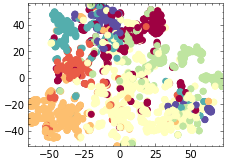

In [12]:
with plt.style.context(['science', 'no-latex']):
    plt.scatter(X_embedded[:,0], X_embedded[:,1], c=labels, cmap=plt.cm.Spectral)
    plt.autoscale(tight=True)
    plt.show()    